In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from config.data_config import DATA_CONFIG

In [24]:
train_df = pd.read_csv(DATA_CONFIG.TRAIN_DF)
test_df = pd.read_csv(DATA_CONFIG.TEST_DF)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_1752\914933379.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(DATA_CONFIG.TEST_DF)


In [25]:
train_df['DATE_TIME'] = pd.to_datetime(train_df['DATE_TIME'])
test_df['DATE_TIME'] = pd.to_datetime(test_df['DATE_TIME'])

In [26]:
DATE_TIME = sorted(train_df['DATE_TIME'].unique())

In [27]:
np.max(DATE_TIME)

numpy.datetime64('2021-12-31T00:00:00.000000000')

In [28]:
for dt in DATE_TIME:
    print(dt)
    print(train_df[train_df['DATE_TIME']==dt]['IS_UPSELL_NEXT_3_MONTHS'].value_counts())

2020-03-31T00:00:00.000000000
0    789
1    215
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-04-30T00:00:00.000000000
0    1331
1     454
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-05-31T00:00:00.000000000
0    2230
1     921
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-06-30T00:00:00.000000000
0    2605
1    1253
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-07-31T00:00:00.000000000
0    3192
1    1979
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-08-31T00:00:00.000000000
0    4097
1    3007
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-09-30T00:00:00.000000000
1    4479
0    4478
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-10-31T00:00:00.000000000
1    5805
0    4843
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-11-30T00:00:00.000000000
1    6288
0    5773
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2020-12-31T00:00:00.000000000
0    6355
1    6174
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64
2021-01-31T00:00:00.000000000
0    7100
1    6093
Name: IS_UPS

In [84]:
train_df['fold'] = -999

In [85]:
train_df.sort_values('DATE_TIME',inplace=True)

In [86]:
train_df.reset_index(drop=True, inplace=True)

In [87]:
train_df.loc[train_df.DATE_TIME==DATE_TIME[-1],'fold'] = 10
train_df.loc[train_df.DATE_TIME==DATE_TIME[-2],'fold'] = 9
train_df.loc[train_df.DATE_TIME==DATE_TIME[-3],'fold'] = 8
train_df.loc[train_df.DATE_TIME==DATE_TIME[-4],'fold'] = 7
train_df.loc[train_df.DATE_TIME==DATE_TIME[-5],'fold'] = 6
train_df.loc[train_df.DATE_TIME==DATE_TIME[-6],'fold'] = 5
train_df.loc[train_df.DATE_TIME==DATE_TIME[-7],'fold'] = 4
train_df.loc[train_df.DATE_TIME==DATE_TIME[-8],'fold'] = 3
train_df.loc[train_df.DATE_TIME==DATE_TIME[-9],'fold'] = 2

In [90]:
train_df.loc[train_df.DATE_TIME==DATE_TIME[-9]]

TIME_TO_DISBURSE  DATE_TIME NEXT_DISBURSE_DATE_WID  LOAN_STATUS  \
115418                 3 2021-04-30             2021-07-31            1   
115419                13 2021-04-30             2022-05-31            1   
115420                 3 2021-04-30             2021-07-31            1   
115421                 1 2021-04-30             2021-05-31            1   
115422                 1 2021-04-30             2021-05-31            1   
...                  ...        ...                    ...          ...   
135995                 8 2021-04-30             2021-12-31            1   
135996                12 2021-04-30             2022-04-30            1   
135997                 2 2021-04-30             2021-06-30            1   
135998                 8 2021-04-30             2021-12-31            1   
135999                 6 2021-04-30             2021-10-31            1   

        CURENT_LTV  INCREASE_RATIO  CURRENT_DPD  PRINCIPAL_REMAIN  \
115418    0.337838       -0.362162          0.0         4980653.0   
115419    0.647773       -0.001999          0.0        12869137.0   
115420    0.699136        0.005179          0.0         8300089.0   
115421    0.223881       -0.569455          0.0         1123245.0   
115422    0.413608       -0.087645          0.0        14565218.0   
...            ...             ...          ...               ...   
135995    0.646715        0.021715        105.0         9861728.0   
135996    0.647249        0.000689          0.0        17660886.0   
135997    0.646498       -0.003502          0.0        15540131.0   
135998    0.666667        0.007386          0.0         7240297.0   
135999    0.648855        0.000359         13.0         7910015.0   

        MAX_DPD_EVR  MAX_DPD_12M  ...  NUMBER_OF_CHILD  ZALO  FACEBOOK  \
115418           11           11  ...              NaN   NaN       NaN   
115419            0            0  ...              NaN   NaN       NaN   
115420            0            0  ...              NaN   NaN       NaN   
115421            0            0  ...              NaN   NaN       NaN   
115422            0            0  ...              NaN   NaN       NaN   
...             ...          ...  ...              ...   ...       ...   
135995          105          105  ...              NaN   NaN       NaN   
135996            0            0  ...              NaN   NaN       NaN   
135997            0            0  ...              NaN   NaN       NaN   
135998            0            0  ...              NaN   NaN       NaN   
135999           42           42  ...              NaN   NaN       NaN   

        MONTHLY_INCOME_VALUE  SALARY_TYPE_CODE  RANK_          GRP_NM  \
115418                   NaN               NaN      1  10 -> 15 triệu   
115419                   NaN               NaN      1  10 -> 15 triệu   
115420                   NaN               NaN      1    5 -> 8 triệu   
115421                   NaN               NaN      1  10 -> 15 triệu   
115422                   NaN               NaN      1   8 -> 10 triệu   
...                      ...               ...    ...             ...   
135995                   NaN               NaN      1   8 -> 10 triệu   
135996                   NaN               NaN      1   8 -> 10 triệu   
135997                   NaN               NaN      1   8 -> 10 triệu   
135998                   NaN               NaN      1  10 -> 15 triệu   
135999                   NaN               NaN      1    5 -> 8 triệu   

                  JOB_NM_WCD  IS_UPSELL_NEXT_3_MONTHS  fold  
115418                   NaN                        1     2  
115419                   NaN                        0     2  
115420  Nhân viên văn phòng                        1     2  
115421                   NaN                        1     2  
115422                   NaN                        1     2  
...                      ...                      ...   ...  
135995                   NaN                        0     2  
135996        Cô

In [70]:
null_cols = train_df.isnull().sum()/ train_df.shape[0]*100
null_cols.sort_values(ascending=False)

PROVINCE_NM             100.0
MONTHLY_INCOME_VALUE    100.0
A_SCORE                 100.0
JOB_NM                  100.0
WORKPLACE_CODE          100.0
                        ...  
NO_CONTRACT_9M            0.0
NO_CONTRACT_12M           0.0
SLHD                      0.0
DATE_TIME                 0.0
fold                      0.0
Length: 117, dtype: float64

In [71]:
numerical = [x for x in train_df.columns if train_df[x].dtypes in [np.int64, np.float64] and null_cols[x]<90 and x not in ['CUSTOMER_CODE',"CUSTOMER_CODE_2","DATE_TIME","DISTRIBUTE_DATE_WID","NEXT_DISBURSE_DATE_WID", "TIME_TO_DISBURSE",DATA_CONFIG.TARGET_COLUMNS,'fold']]

In [72]:
categorical  = [x for x in train_df.columns if x not in ['CUSTOMER_CODE',"CUSTOMER_CODE_2","DATE_TIME","DISTRIBUTE_DATE_WID","NEXT_DISBURSE_DATE_WID", "TIME_TO_DISBURSE"] + numerical]

In [73]:
from lightgbm import LGBMRegressor, LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [74]:
categorical_features = ["GENDER","INDUSTRY_NM","GRP_NM", "TRADE_LEAD"]

In [75]:
def feature_engineering(df: pd.DataFrame = train_df, is_train=True):
    new_df = pd.DataFrame()
    for col in numerical:
        new_df[col] = df[col]
        new_df[col] = new_df[col].fillna(-999)
    new_df['CO_THE_VAY_THEM']
    for col in categorical_features:
        new_df[col] = df[col]
        new_df[col] = new_df[col].astype('category')
    return new_df

In [76]:
# new_train_df = feature_engineering(train_df)
# new_test_df = feature_engineering(test_df)

In [77]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

In [78]:
train_df.sort_values('DATE_TIME',inplace=True)

In [94]:
X_train = train_df[train_df.fold < 3]
X_valid = train_df[train_df.fold == 3]

In [95]:
X_train

TIME_TO_DISBURSE  DATE_TIME NEXT_DISBURSE_DATE_WID  LOAN_STATUS  \
0                      6 2020-03-31             2020-09-30            1   
1                     23 2020-03-31             2022-02-28            1   
2                      9 2020-03-31             2020-12-31            1   
3                      9 2020-03-31             2020-12-31            1   
4                      9 2020-03-31             2020-12-31            1   
...                  ...        ...                    ...          ...   
135995                 8 2021-04-30             2021-12-31            1   
135996                12 2021-04-30             2022-04-30            1   
135997                 2 2021-04-30             2021-06-30            1   
135998                 8 2021-04-30             2021-12-31            1   
135999                 6 2021-04-30             2021-10-31            1   

        CURENT_LTV  INCREASE_RATIO  CURRENT_DPD  PRINCIPAL_REMAIN  \
0         0.598414        0.013619          0.0        23317839.0   
1         0.598765        0.038504          0.0         9607268.0   
2         0.555556        0.001539          0.0        14045730.0   
3         0.588235       -0.001929          0.0         9363820.0   
4         0.526316       -0.071124          0.0         4681910.0   
...            ...             ...          ...               ...   
135995    0.646715        0.021715        105.0         9861728.0   
135996    0.647249        0.000689          0.0        17660886.0   
135997    0.646498       -0.003502          0.0        15540131.0   
135998    0.666667        0.007386          0.0         7240297.0   
135999    0.648855        0.000359         13.0         7910015.0   

        MAX_DPD_EVR  MAX_DPD_12M  ...  NUMBER_OF_CHILD  ZALO  FACEBOOK  \
0                 0            0  ...              NaN   NaN       NaN   
1                18           18  ...              NaN   NaN       NaN   
2                 0            0  ...              NaN   NaN       NaN   
3                 0            0  ...              NaN   NaN       NaN   
4                 0            0  ...              NaN   NaN       NaN   
...             ...          ...  ...              ...   ...       ...   
135995          105          105  ...              NaN   NaN       NaN   
135996            0            0  ...              NaN   NaN       NaN   
135997            0            0  ...              NaN   NaN       NaN   
135998            0            0  ...              NaN   NaN       NaN   
135999           42           42  ...              NaN   NaN       NaN   

        MONTHLY_INCOME_VALUE  SALARY_TYPE_CODE  RANK_          GRP_NM  \
0                        NaN               NaN      1   8 -> 10 triệu   
1                        NaN               NaN      1  10 -> 15 triệu   
2                        NaN               NaN      1   8 -> 10 triệu   
3                        NaN               NaN      1   8 -> 10 triệu   
4                        NaN               NaN      1   8 -> 10 triệu   
...                      ...               ...    ...             ...   
135995                   NaN               NaN      1   8 -> 10 triệu   
135996                   NaN               NaN      1   8 -> 10 triệu   
135997                   NaN               NaN      1   8 -> 10 triệu   
135998                   NaN               NaN      1  10 -> 15 triệu   
135999                   NaN               NaN      1    5 -> 8 triệu   

                           JOB_NM_WCD  IS_UPSELL_NEXT_3_MONTHS  fold  
0       Thợ xây/ sửa chữa/cơ khí…                        0  -999  
1                                 NaN                        0  -999  
2                                 NaN                        0  -999  
3                                 NaN                        0  -999  
4                                 NaN                        0  -999  
...                               ...                      ...   ...  
135995         

In [107]:
oofs = np.zeros(train_df.shape[0])
oofs += -99
models = []
for fold in range(2,11):
    print("#"*25)
    print("Fold", fold)
    print("#"*25)
    X_train = train_df[train_df.fold < fold]
    X_valid = train_df[train_df.fold == fold]
    y_train = train_df[train_df.fold < fold][DATA_CONFIG.TARGET_COLUMNS]
    y_valid = train_df[train_df.fold == fold][DATA_CONFIG.TARGET_COLUMNS]
    print(f"train from {X_train['DATE_TIME'].min()} to {X_train['DATE_TIME'].max()}")
    print(f"valid from {X_valid['DATE_TIME'].min()} to {X_valid['DATE_TIME'].max()}")

    X_train  = feature_engineering(X_train)
    X_valid = feature_engineering(X_valid)
    # valid_index = X_valid.index
    # display(X_valid.tail(10))
    # print(valid_index[0], valid_index[-1])
    model = LGBMClassifier(n_estimators=1000,
                           learning_rate=0.01,
                           max_depth=12,
                           colsample_bytree=0.8,
                           reg_alpha=8,
                           reg_lambda=32,
                           subsample=0.8,
                           device="gpu",
                           random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric=["logloss","AUC"],
              categorical_feature=categorical_features,
              early_stopping_rounds=100,
              verbose=100)
    y_pred = model.predict(X_valid)
    y_pred_prob = model.predict_proba(X_valid)[:,1]
    # oofs[valid_index] = y_pred_prob
    y_pred = (y_pred_prob>0.55).astype(int)
    models.append(model)
    print(classification_report(y_valid, y_pred))
    print(roc_auc_score(y_valid, y_pred_prob))

#########################
Fold 2
#########################
train from 2020-03-31 00:00:00 to 2021-03-31 00:00:00
valid from 2021-04-30 00:00:00 to 2021-04-30 00:00:00
[100]	training's binary_logloss: 0.545473	training's auc: 0.823951	valid_1's binary_logloss: 0.524085	valid_1's auc: 0.790424
[200]	training's binary_logloss: 0.514025	training's auc: 0.82812	valid_1's binary_logloss: 0.497224	valid_1's auc: 0.792836
[300]	training's binary_logloss: 0.50418	training's auc: 0.830808	valid_1's binary_logloss: 0.489617	valid_1's auc: 0.796905
[400]	training's binary_logloss: 0.499263	training's auc: 0.833649	valid_1's binary_logloss: 0.486148	valid_1's auc: 0.802144
[500]	training's binary_logloss: 0.495704	training's auc: 0.836581	valid_1's binary_logloss: 0.483758	valid_1's auc: 0.806106
[600]	training's binary_logloss: 0.492764	training's auc: 0.839108	valid_1's binary_logloss: 0.481688	valid_1's auc: 0.808904
[700]	training's binary_logloss: 0.490204	training's auc: 0.841445	valid_1's bi

In [202]:
y_valid_oof = train_df.iloc[oofs>=0][DATA_CONFIG.TARGET_COLUMNS]
y_pred_oof = oofs[oofs>=0]

In [203]:
from sklearn.metrics import f1_score
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.2,0.9,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (y_pred_oof>threshold).astype('int')
    m = f1_score(y_valid_oof, preds, average='macro')
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 

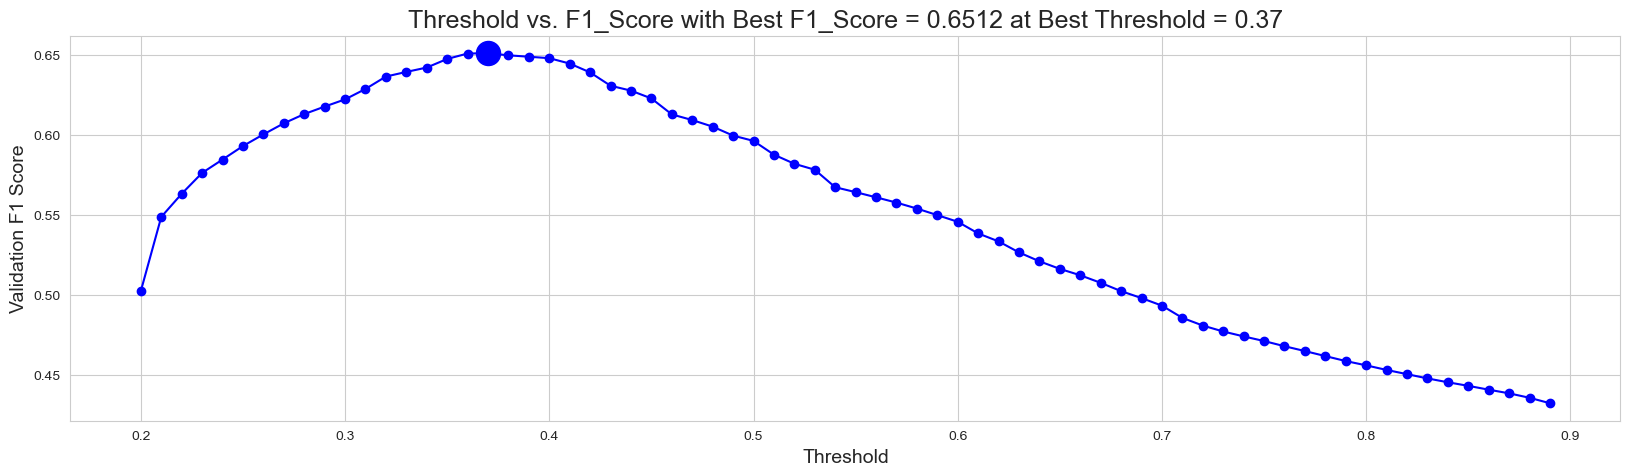

In [204]:
import matplotlib.pyplot as plt

# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.4f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()

In [108]:
new_test_df = feature_engineering(test_df)
y_pred_prob = np.zeros(new_test_df.shape[0])
for model in models:
    y_pred_prob+=model.predict_proba(new_test_df)[:,1]/len(models)

In [109]:
y_preds = y_pred_prob>0.45

In [110]:
print(classification_report(test_df[DATA_CONFIG.TARGET_COLUMNS], y_preds, digits=4))


              precision    recall  f1-score   support

           0     0.5676    0.0819    0.1432    249567
           1     0.6297    0.9616    0.7610    405182

    accuracy                         0.6263    654749
   macro avg     0.5987    0.5217    0.4521    654749
weighted avg     0.6060    0.6263    0.5255    654749



In [223]:
oofs

array([-99.        , -99.        , -99.        , ...,   0.41760889,
         0.28989251,   0.41743432])